In [9]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as wn
wn.filterwarnings('ignore')

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        path = os.path.join(dirname, filename)

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [4]:
df = pd.read_csv(path)

In [5]:
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [22]:
df.drop(
    'id',
    axis=1,
    inplace=True
)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             391 non-null    float64
 1   bp              388 non-null    float64
 2   sg              353 non-null    float64
 3   al              354 non-null    float64
 4   su              351 non-null    float64
 5   rbc             248 non-null    object 
 6   pc              335 non-null    object 
 7   pcc             396 non-null    object 
 8   ba              396 non-null    object 
 9   bgr             356 non-null    float64
 10  bu              381 non-null    float64
 11  sc              383 non-null    float64
 12  sod             313 non-null    float64
 13  pot             312 non-null    float64
 14  hemo            348 non-null    float64
 15  pcv             330 non-null    object 
 16  wc              295 non-null    object 
 17  rc              270 non-null    obj

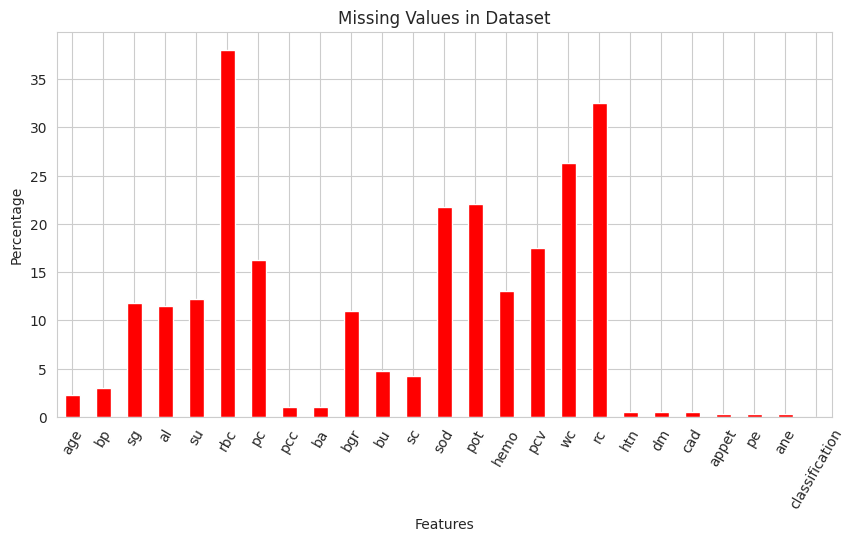

In [24]:
sns.set_style(
    style='whitegrid'
)
null_values = df.isnull().sum()/df.shape[0]*100
plt.figure(
    figsize=(10,5)
)
plt.title('Missing Values in Dataset')
null_values.plot(
    kind='bar', 
    color='red'
)
plt.xlabel('Features')
plt.ylabel('Percentage')
plt.xticks(
    rotation=60
)
plt.show()

# Feature Engineering

In [37]:
columns = null_values[null_values<5].index.tolist()
columns

['age',
 'bp',
 'pcc',
 'ba',
 'bu',
 'sc',
 'htn',
 'dm',
 'cad',
 'appet',
 'pe',
 'ane',
 'classification']

In [39]:
df[columns].isnull().sum()

age                9
bp                12
pcc                4
ba                 4
bu                19
sc                17
htn                2
dm                 2
cad                2
appet              1
pe                 1
ane                1
classification     0
dtype: int64

## Handle Missing values

In [45]:
from sklearn.impute import KNNImputer

In [57]:
Info = df.dtypes
num_col = Info[Info==float].index.tolist()

In [58]:
num_col

['age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo']

In [62]:
df[num_col].head()

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
0,48.0,80.0,1.020,1.0,0.0,121.0,36.0,1.2,NaN,NaN,15.4
1,7.0,50.0,1.020,4.0,0.0,NaN,18.0,0.8,NaN,NaN,11.3
2,62.0,80.0,1.010,2.0,3.0,423.0,53.0,1.8,NaN,NaN,9.6
3,48.0,70.0,1.005,4.0,0.0,117.0,56.0,3.8,111.0,2.5,11.2
4,51.0,80.0,1.010,2.0,0.0,106.0,26.0,1.4,NaN,NaN,11.6


In [60]:
imputer = KNNImputer(
    n_neighbors=5,
)
data = imputer.fit_transform(df[num_col])
pd.DataFrame(
    data=data,
    columns=num_col
)

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
0,48.0,80.0,1.020,1.0,0.0,121.0,36.0,1.2,140.0,4.22,15.4
1,7.0,50.0,1.020,4.0,0.0,110.4,18.0,0.8,137.8,4.02,11.3
2,62.0,80.0,1.010,2.0,3.0,423.0,53.0,1.8,136.2,4.32,9.6
3,48.0,70.0,1.005,4.0,0.0,117.0,56.0,3.8,111.0,2.50,11.2
4,51.0,80.0,1.010,2.0,0.0,106.0,26.0,1.4,138.4,4.26,11.6
...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,140.0,49.0,0.5,150.0,4.90,15.7
396,42.0,70.0,1.025,0.0,0.0,75.0,31.0,1.2,141.0,3.50,16.5
397,12.0,80.0,1.020,0.0,0.0,100.0,26.0,0.6,137.0,4.40,15.8
398,17.0,60.0,1.025,0.0,0.0,114.0,50.0,1.0,135.0,4.90,14.2
